In [ ]:
# SENTIMENTAL ANALYSIS FROM OUR BLOG SPOT
!pip install scikit-learn
!pip install pandas
!pip install mysql-connector-python

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from string import punctuation

In [ ]:
#TRAINING OUR MODEL
# Load the data
data = pd.read_csv("sentiment_data.csv")

# Spliting our data into training and testing sets
train_data = data.iloc[:800, :]
test_data = data.iloc[800:, :]

# Creating a CountVectorizer object to convert the text data into numerical vectors
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
vectorizer = CountVectorizer(stop_words='english')

# Converting the text data into numerical vectors
X_train = vectorizer.fit_transform(train_data.Sentence)
y_train = train_data.Sentiment

X_test = vectorizer.transform(test_data.Sentence)
y_test = test_data.Sentiment

# Creating a Naive Bayes classifier object
clf = MultinomialNB()

# Training the classifier on the training data
clf.fit(X_train, y_train)

# Predicting the sentiment of the test data
y_pred = clf.predict(X_test)

# Calculating the accuracy of the classifier
accuracy = (y_pred == y_test).mean()

print("Accuracy:", accuracy)


Accuracy: 0.6291154303847679


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Connecting to the database
mydb = mysql.connector.connect(
  host="localhost",
  user="yourusername",
  password="yourpassword",
  database="yourdatabase"
)

# Creating a cursor object to interact with the database
mycursor = mydb.cursor()

# Executing a SELECT query to retrieve user comments from my table named 'comments'
mycursor.execute("SELECT comment_text FROM comments")

# Fetching all the rows returned by the query
rows = mycursor.fetchall()

# Closing the cursor and database connection
mycursor.close()
mydb.close()

# Converting the fetched rows to a pandas dataframe
comments_df = pd.DataFrame(rows, columns=["Comment"])

# Using the trained classifier to predict the sentiment of the comments
comment_vectors = vectorizer.transform(comments_df["Comment"])
comments_df["Sentiment"] = clf.predict(comment_vectors)

# Displaying the sentiment distribution of the comments
print(comments_df["Sentiment"].value_counts())

sentiments = []
for comment in comments:
    # Preprocess the comment text (e.g. remove stop words, punctuation, etc.)
    comment = ' '.join([word for word in text.lower().split() if word not in stop_words and word not in punctuation])
    # Convert the preprocessed text into a numerical vector using CountVectorizer
    x = vectorizer.transform([comment])
    # Predict the sentiment using the trained classifier
    senti = clf.predict(x)
    senti.append(senti[0])

# Count the number of positive and negative comments
n_positive = senti.count('positive')
n_negative = senti.count('negative')

# Create a pie chart
plt.pie([n_positive, n_negative], labels=['Positive', 'Negative'], autopct='%1.1f%%')
plt.show()

In [ ]:
#########################################################################################################################
#########################################################################################################################
#########################################################################################################################

In [ ]:
#Sentiment analysis from newsapi.org
!pip install nltk
!pip install newsapi-python

In [ ]:
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

2023-04-26T11:16:00Z The Ratings Game: Microsoft just delivered ‘exactly what software needed’ amid ‘doom and gloom’ Microsoft offered some welcome relief to the software sector overnight against what one analyst described as a "doom and gloom" backdrop. {'neg': 0.149, 'neu': 0.708, 'pos': 0.144, 'compound': -0.0516}
2023-04-13T09:53:22Z This investor can spot market bubbles. Now he's warning of an 'ominous' bust Jeremy Grantham made his name predicting the dot-com crash in 2000 and the financial crisis in 2008. Now, the famous investor warns another epic bubble in financial markets is bursting — and the turmoil that swept through the banking sector last month is just… {'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'compound': -0.9022}
2023-04-11T16:06:00Z : Biden administration considers crack down on AI tools such as ChatGPT The Biden administration is edging toward rules on AI tools such as ChatGPT over fears the technology could be used to spread falsehoods and discrimination. {'neg': 0.

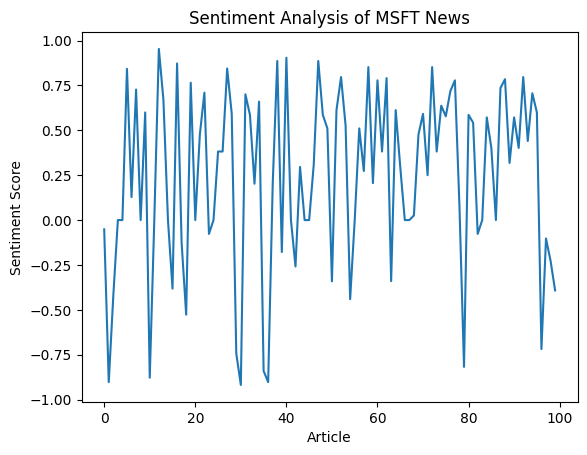

In [ ]:
# Initializing the NLTK Sentiment Analyzer
sia = SentimentIntensityAnalyzer()
# Initializing the NewsAPI client with your API key
newsapi = NewsApiClient(api_key='80b0c10b01ea4423b761bb74a152d3d6')
# Specify the stock you want to analyze
stock = 'MSFT'
# Get news articles related to the stock from the past 24 hours
articles = newsapi.get_everything(q=stock, language='en', from_param='2023-04-11', to='2023-04-28', sort_by='relevancy')
# Initialize counters for sentiment scores
sentiment_scores = []
positive_score = 0
negative_score = 0
neutral_score = 0
# Analyze the sentiment of each article
for article in articles['articles']:
    text = article['title'] + ' ' + article['description']
    sentiment = sia.polarity_scores(text)
    sentiment_scores.append(sentiment['compound'])
    print(article['publishedAt'], text, sentiment)
    # Increment the appropriate counter based on the sentiment score
    if sentiment['compound'] > 0.05:
        positive_score += 1
    elif sentiment['compound'] < -0.05:
        negative_score += 1
    else:
        neutral_score += 1
# Compute the total sentiment score
total_score = positive_score - negative_score
# Print the sentiment score
print(f'The sentiment score for {stock} is {total_score}.')
# Plot the sentiment scores on a graph
plt.plot(sentiment_scores)
plt.xlabel('Article')
plt.ylabel('Sentiment Score')
plt.title(f'Sentiment Analysis of {stock} News')
plt.show()